In [2]:
import numpy
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
# load dataset
path=r"C:\Users\acer\Desktop\all_squat\merged.csv"
dataframe=pd.read_csv(path,low_memory=False)
dataframe.drop(dataframe.columns[[0,1]],axis=1,inplace=True)
dataset=dataframe.values
X = dataset[:,0:16].astype('float')
Y = dataset[:,16:].astype('float')

def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mae', optimizer='adam')
    return model
def evaluate_model(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=2, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        #normalize input
        input_scaler = MinMaxScaler()
        input_scaler.fit(X_train)
        X_train = input_scaler.transform(X_train)
        X_test = input_scaler.transform(X_test)
        
        
        
        #normalize target
        target_scaler = MinMaxScaler()
        target_scaler.fit(y_train)
        y_train = target_scaler.transform(y_train)
        y_test = target_scaler.transform(y_test)

        # define model
        model = get_model(n_inputs, n_outputs)
        # fit model
        model.fit(X_train, y_train, verbose=0, epochs=100)
        # evaluate model on test set
        mae = model.evaluate(X_test, y_test, verbose=0)
        # store result
        print('>%.3f' % mae)
        results.append(mae)
    return results
results = evaluate_model(X, Y)
'MAE: %.3f (%.3f)' % (mean(results), std(results))

>0.116
>0.124
>0.120
>0.126
>0.119
>0.119
>0.121
>0.123
>0.114
>0.124
>0.131
>0.125
>0.119
>0.121
>0.124
>0.123
>0.118
>0.117
>0.124
>0.109


'MAE: 0.121 (0.005)'

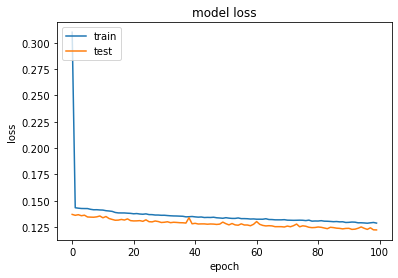

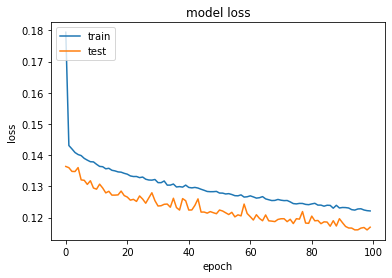

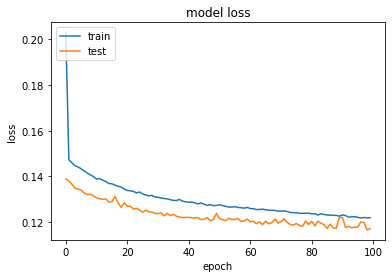

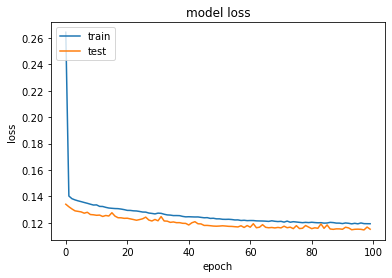

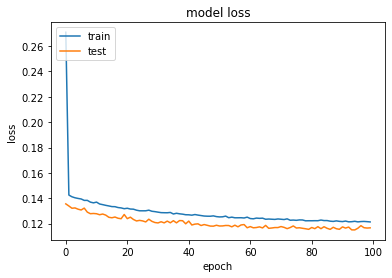

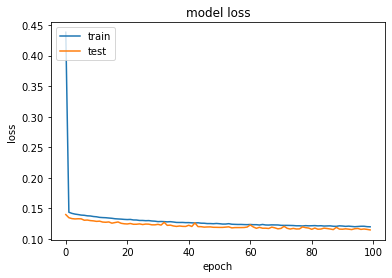

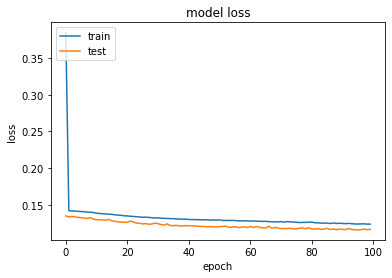

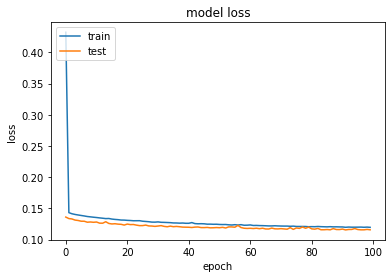

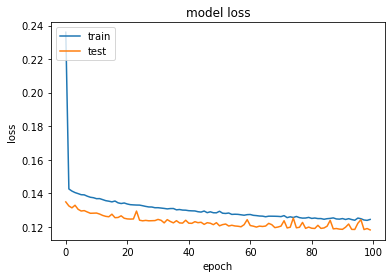

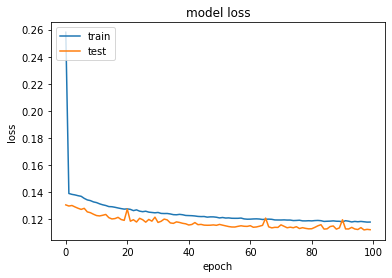

'MAE: 0.121 (0.005)'

In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
def plot_model(X, y):
    results = list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(X):
        # prepare data
        X_train, X_test = X[train_ix], X[test_ix]
        y_train, y_test = y[train_ix], y[test_ix]
        #normalize input
        input_scaler = MinMaxScaler()
        input_scaler.fit(X_train)
        X_train = input_scaler.transform(X_train)
        X_test = input_scaler.transform(X_test)
        
        
        
        #normalize target
        target_scaler = MinMaxScaler()
        target_scaler.fit(y_train)
        y_train = target_scaler.transform(y_train)
        y_test = target_scaler.transform(y_test)
        # validation set
        X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, random_state=7)
        # define model
        model = get_model(n_inputs, n_outputs)
        # fit model
        history=model.fit(X_train, y_train, verbose=0, epochs=100 ,validation_data=(x_val,y_val))
        
        plt.plot(history.history[ 'loss' ])
        plt.plot(history.history[ 'val_loss' ])
        plt.title( 'model loss' )
        plt.ylabel( 'loss' )
        plt.xlabel( 'epoch' )
        plt.legend([ 'train' , 'test' ], loc= 'upper left' )
        plt.show()
        mae = model.evaluate(X_test, y_test, verbose=0)
        results.append(mae)
    return  results 
plot_model(X, Y)
'MAE: %.3f (%.3f)' % (mean(results), std(results))